# Kontrolna točka 3 - Poboljšanje rezultata

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Usporedba rezultata eksperimenata 1, 2 s "običnim" i skaliranim SSK


- normalizacija SSK scorea temeljna je za ispravnu interpretaciju vrijednosti kernel funkcije među da dokumenta ->
njome eliminiramo efekt duljine 
- pr. kraći dokument imat će veću vrijednost nenormaliziranog SSK-a s nekim ne nužno sličnim, ali duljim dokumentom, nego sam za sobom, iz jednostavnog razloga što se u duljem dokumentu nužno i više puta pojaljuju razni substringovi
- ovo je loše i rezultira neispravnom treniranju granice kod SVM-a
- želimo da je vrijednost uvijek najveća između primjerka sa samim sobom

- normalizacija već implementiranog optimiziranog algoritamskog računa SVM-a nije trivijalna, stoga smo se odlučili za aproksimaciju normalizacije-> ssk score podijelili smo s duljinom većeg dokumenta u paru
- ovom aproksimacijom/skaliranjem ostvarili smo barem jedno poboljšanje u odnosu na nenormalizirani SSK-> primjer je najsličniji sam sebi (vrijednost funkcije najveća je sa samim sobom)
- ovo smo svojstvo provjerili eksperimentalno (na uzorku od 60 dokumenata)

Ponovili smo eksperimente 1 i 2, ali ovaj puta koisteći naš skalirani SSK, u nadi da ćemo primijetiti poboljšanje.\
U nastavku prikazujemo usporedbe  neskaliranog i skaliranog SSK, u vidu tablica i grafova.

Napomena: rezultati izvođenja nalaze se u izvornom obliku u **data/results/**, a dobiveni su izvođenjem isječaka koda iz Jupyter bilježnica **ssk_modules/experiments.ipynb** i **ssk_modules/poboljsanje_rezultata.ipynb**

### eksperiment 1

In [9]:
files=["./data/results/original_results/exp1_5_iterations__4_classes__100_in_each_class.csv",
       "./data/results/scaled_ssk/exp1_scaledssk_5_iterations__4_classes__100_in_each_class.csv"]

agg_results=[]
for resfile in files:
    results=pd.read_csv(resfile)
    results=results.applymap(lambda x: '-' if str(x).lower() == 'nan' else x)
    resultsagg = results.groupby([ 'Kernel', 'k', 'lambda'],dropna=False).agg({'F1-Score': ['mean', 'std'], 'Precision': ['mean', 'std'], 'Recall': ['mean', 'std']}).reset_index()

    resultsagg=resultsagg.sort_values(by=[ 'Kernel', 'k', 'lambda']).reset_index(drop=True)
    agg_results.append(resultsagg)
    print(resultsagg)

   Kernel     k lambda  F1-Score           Precision            Recall  \
                            mean       std      mean       std    mean   
0     NGK   3.0      -  0.965138  0.026918  0.968627  0.049553  0.9650   
1     NGK   4.0      -  0.955188  0.031104  0.959873  0.056631  0.9550   
2     NGK   5.0      -  0.965166  0.021343  0.968223  0.045689  0.9650   
3     NGK   6.0      -  0.962539  0.018476  0.965625  0.042775  0.9625   
4     NGK   7.0      -  0.960034  0.023020  0.963125  0.044860  0.9600   
5     NGK   8.0      -  0.949925  0.037425  0.956195  0.062006  0.9500   
6     NGK  10.0      -  0.940274  0.038634  0.947140  0.068708  0.9400   
7     NGK  12.0      -  0.930212  0.039469  0.937453  0.069265  0.9300   
8     SSK   3.0    0.5  0.842729  0.063852  0.856254  0.096760  0.8425   
9     SSK   4.0    0.5  0.860470  0.060311  0.870563  0.090646  0.8600   
10    SSK   5.0    0.5  0.863258  0.057246  0.874279  0.091709  0.8625   
11    SSK   6.0    0.5  0.863258  0.05

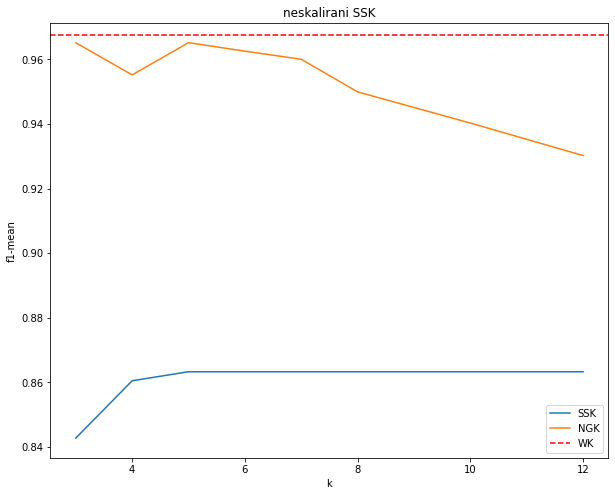

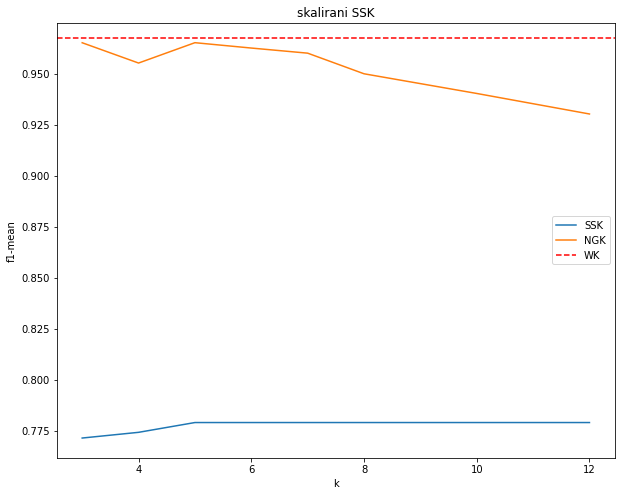

In [10]:

titles=['neskalirani SSK', 'skalirani SSK']
for i, aggresults in enumerate(agg_results):
    plt.figure(figsize=(10, 8))
    plt.title(titles[i])
    plt.xlabel('k')
    plt.ylabel('f1-mean')

    # Plot a line for each kernel
    for kernel_label in ['SSK', 'NGK']:
        kernel_data = aggresults[aggresults['Kernel'] == kernel_label]
        plt.plot(kernel_data['k'], kernel_data['F1-Score', 'mean'], label=kernel_label)

    wkvalue=aggresults[resultsagg['Kernel']=='WK']['F1-Score', 'mean'].item()
    plt.axhline(y=wkvalue, color='r', linestyle='--', label=f'WK')

    plt.legend()
    plt.show()

### eksperiment 2

In [11]:
files=["./data/results/original_results/exp2_5_iterations__4_classes__100_in_each_class.csv",
       "./data/results/scaled_ssk/exp2_scaledssk_5_iterations__4_classes__100_in_each_class.csv"]

agg_results=[]
for resfile in files:
    results=pd.read_csv(resfile)
    results=results.applymap(lambda x: '-' if str(x).lower() == 'nan' else x)
    resultsagg = results.groupby([ 'Kernel', 'k', 'lambda'],dropna=False).agg({'F1-Score': ['mean', 'std'], 'Precision': ['mean', 'std'], 'Recall': ['mean', 'std']}).reset_index()

    resultsagg=resultsagg.sort_values(by=[ 'Kernel', 'k', 'lambda']).reset_index(drop=True)
    agg_results.append(resultsagg)
    print(resultsagg)

   Kernel    k lambda  F1-Score           Precision            Recall  \
                           mean       std      mean       std    mean   
0     NGK  5.0      -  0.965166  0.021067  0.968223  0.045099  0.9650   
1     SSK  5.0   0.01  0.534936  0.183304  0.611453  0.181583  0.5550   
2     SSK  5.0   0.03  0.625752  0.116244  0.649317  0.134379  0.6275   
3     SSK  5.0   0.05  0.639191  0.122924  0.657893  0.124093  0.6425   
4     SSK  5.0   0.07  0.597157  0.159871  0.614970  0.163401  0.6000   
5     SSK  5.0   0.09  0.569394  0.142812  0.596079  0.156593  0.5750   
6     SSK  5.0    0.1  0.590821  0.150524  0.616178  0.145737  0.5975   
7     SSK  5.0    0.3  0.700748  0.093466  0.725423  0.094316  0.7075   
8     SSK  5.0    0.5  0.863258  0.057246  0.874279  0.091709  0.8625   
9     SSK  5.0    0.7  0.888694  0.048771  0.899586  0.090744  0.8875   
10    SSK  5.0    0.8  0.872989  0.054795  0.886122  0.095143  0.8725   
11    SSK  5.0    0.9  0.846392  0.073400  0.856249

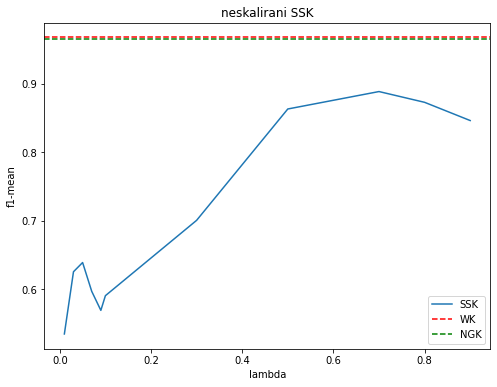

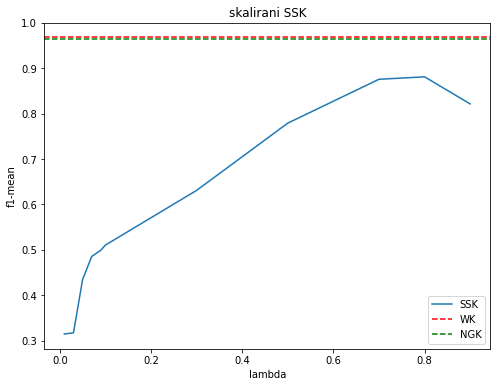

In [12]:
titles=['neskalirani SSK', 'skalirani SSK']
for i, aggresults in enumerate(agg_results):
    plt.figure(figsize=(8, 6))
    plt.title(titles[i])
    plt.xlabel('lambda')
    plt.ylabel('f1-mean')

    # Plot a line for each kernel
    for kernel_label in ['SSK']:
        kernel_data = aggresults[aggresults['Kernel'] == kernel_label]
        plt.plot(kernel_data['lambda'], kernel_data['F1-Score', 'mean'], label=kernel_label)

    wkvalue=aggresults[resultsagg['Kernel']=='WK']['F1-Score', 'mean'].item()
    plt.axhline(y=wkvalue, color='r', linestyle='--', label=f'WK')

    ngk_value=aggresults[resultsagg['Kernel']=='NGK']['F1-Score', 'mean'].item()
    plt.axhline(y=ngk_value, color='g', linestyle='--', label=f'NGK')

    plt.legend()
    plt.show()

Zaključak:
- na prvu se čini da skalirani SSK daje gore rezuate od neskaliranog, ali kao što vidimo razlika se eliminira kad promijenimo paktor pada težine
- u prvom eksperimentu jednak je 0.5, pri čemu neskalirani daje bolje rezultate od skaliranog
- u drugome vidimo da 0.5 nije optimalan ni za jednu opciju - neskalirani najbolje funkcionira za 0.7, dok skalirani za 0.8
- pri tome su najbolji rezultati otprilike podjednaki 

<p align="center"> <strong>F1[ssk(5,0.7)] ≈ F1[scaled_ssk(5,0.8)] ≈ 0.88</strong></p>
